In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('train_data_processed.csv')

df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,subject_B,subject_C,subject_D,subject_F,subject_G,subject_H,subject_I,subject_K,subject_L,subject_M
0,0.0,0.0,0.0,1.0,0.169283,0.50,0.72,0.443878,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,1.0,0.109865,0.00,0.52,0.603741,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.633408,0.50,0.68,0.086735,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,0.093049,0.25,0.68,0.649660,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.124439,0.50,0.64,0.561224,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


### Model 1: Random Forest (Baseline Model)

In [3]:
# Separate features and target
X = df.drop('output', axis=1)
y = df['output']

# Step 1: Initialize StratifiedKFold for 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 2: Create a RandomForestClassifier 
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 3: Evaluate the pipeline using Stratified K-Fold Cross-Validation
scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy', n_jobs=-1)

# Print the cross-validation results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.85496183 0.84841876 0.8558952  0.8580786  0.8569869 ]
Mean Accuracy: 0.8549
Standard Deviation: 0.0034


### Feature Selection

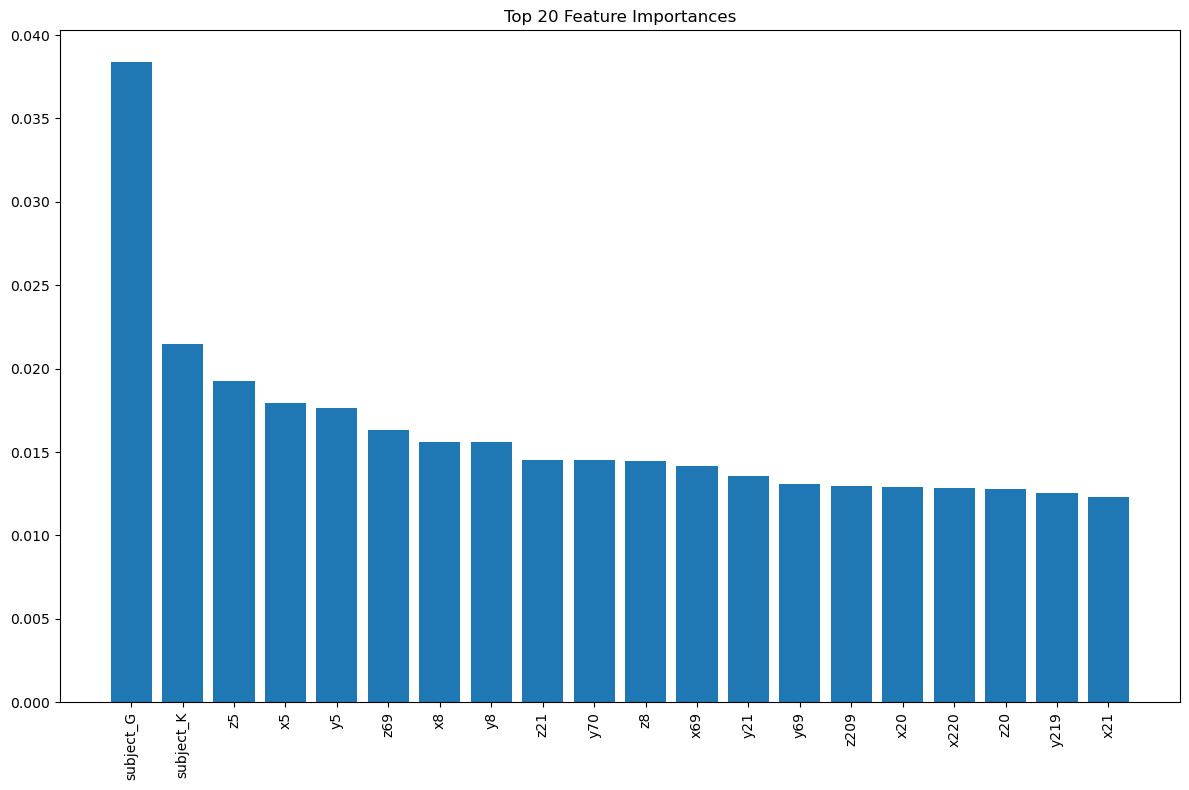

Index(['subject_G', 'subject_K', 'z5', 'x5', 'y5', 'z69', 'x8', 'y8', 'z21',
       'y70', 'z8', 'x69', 'y21', 'y69', 'z209', 'x20', 'x220', 'z20', 'y219',
       'x21', 'phase', 'x221', 'x22', 'z23', 'y20', 'x219', 'z22', 'y22',
       'x23', 'y23', 'z219', 'y67', 'z70', 'x70', 'z220', 'z68', 'z67', 'y71',
       'x67', 'y68', 'z71', 'y209', 'x106', 'x71', 'x68', 'x222', 'x209',
       'y220', 'x7', 'subject_I', 'x19', 'y7', 'y19', 'z19', 'z221', 'z7',
       'subject_L', 'x31', 'subject_M', 'y221', 'x18', 'z31', 'z222',
       'subject_D', 'y18', 'z18', 'z6', 'x30', 'x6', 'y6', 'z30', 'subject_C',
       'y31', 'y222', 'x17', 'subject_B', 'subject_F', 'x200', 'z109', 'x205',
       'x196', 'z106', 'x192', 'z205', 'z17', 'z75', 'y75', 'y17', 'z192',
       'x33', 'z196', 'state_B', 'z200', 'state_C', 'x4', 'x49', 'x75', 'y109',
       'x32', 'x35'],
      dtype='object')


In [4]:
# Train a Random Forest on the training data
rf = RandomForestClassifier(n_estimators=400, random_state=42, class_weight='balanced')
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()

# Select top N features (e.g., top 100)
top_n = 100
selected_features = X.columns[indices[:top_n]]

# Reduce the dataset to selected features
X_selected = X[selected_features]

# print the selected features
print(selected_features)



In [22]:
from sklearn.decomposition import PCA

# Initialize PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

Original number of features: 680
Reduced number of features after PCA: 83


In [29]:
# Get feature importance
feature_importance = np.abs(pca.components_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# # Print the explained variance ratio for each component
# print("Explained Variance Ratio:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.4f}")

# Print the feature importance based on the first principal component
print("\nFeature Importance (based on first principal component):")
for i, importance in enumerate(feature_importance):
    print(f"{X.columns[i]}: {importance:.2f}%")


Feature Importance (based on first principal component):
x1: 0.00%
x2: 0.03%
x3: 0.03%
x4: 64.53%
x5: 17.33%
x6: 27.19%
x7: 7.31%
x8: 27.93%
x9: 0.00%
x10: 0.00%
x11: 0.00%
x12: 0.43%
x13: 0.28%
x14: 0.00%
x15: 0.00%
x16: 0.00%
x17: 0.59%
x18: 0.23%
x19: 6.23%
x20: 15.45%
x21: 15.91%
x22: 1.25%
x23: 1.25%
x24: 0.09%
x25: 0.00%
x26: 0.44%
x27: 0.00%
x28: 0.00%
x29: 0.00%
x30: 2.96%
x31: 3.28%
x32: 64.53%
x33: 29.19%
x34: 0.90%
x35: 24.35%
x36: 0.00%
x37: 0.00%
x38: 0.00%
x39: 0.00%
x40: 0.07%
x41: 0.21%
x42: 5.31%
x43: 32.59%
x44: 18.18%
x45: 6.55%
x46: 1.70%
x47: 0.37%
x48: 0.00%
x49: 20.87%
x50: 12.88%
x51: 6.78%
x52: 2.25%
x53: 0.39%
x54: 0.91%
x55: 1.02%
x56: 1.17%
x57: 0.00%
x58: 0.00%
x59: 0.00%
x60: 0.00%
x61: 0.00%
x62: 0.00%
x63: 0.00%
x64: 0.00%
x65: 0.00%
x66: 0.00%
x67: 15.37%
x68: 2.83%
x69: 31.88%
x70: 18.83%
x71: 9.48%
x72: 0.00%
x73: 0.00%
x74: 0.00%
x75: 1.79%
x76: 0.00%
x77: 0.00%
x78: 0.00%
x79: 0.00%
x80: 0.00%
x81: 0.00%
x82: 0.00%
x83: 0.00%
x84: 0.00%
x85: 0.00%


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline


# Store original column names if X is a DataFrame
if isinstance(X, pd.DataFrame):
    original_feature_names = X.columns
    X = X.values
else:
    original_feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Create a pipeline that includes scaling, PCA, and the classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95, random_state=42)),  # Retain 95% of variance
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Initialize the StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the results
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

# Perform 5-fold cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)
    y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_scores.append(roc_auc_score(y_val, y_pred_proba))
    
    print(f"Fold {fold} completed")

# Print the results
print("\nCross-validation results:")
print(f"Accuracy: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"Precision: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"Recall: {np.mean(recalls):.4f} (+/- {np.std(recalls):.4f})")
print(f"F1-score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"AUC-ROC: {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores):.4f})")

Fold 1 completed
Fold 2 completed
Fold 3 completed
Fold 4 completed
Fold 5 completed

Cross-validation results:
Accuracy: 0.8477 (+/- 0.0047)
Precision: 0.8515 (+/- 0.0026)
Recall: 0.9928 (+/- 0.0047)
F1-score: 0.9167 (+/- 0.0026)
AUC-ROC: 0.8229 (+/- 0.0034)


In [6]:
# Get feature importance
final_pca = pipeline.named_steps['pca']
final_rf = pipeline.named_steps['classifier']

# Get the feature names after PCA
pca_feature_names = [f'PC{i+1}' for i in range(final_pca.n_components_)]

# Get feature importance from the Random Forest
feature_importance = final_rf.feature_importances_

# Create a dataframe of feature importances
importance_df = pd.DataFrame({
    'feature': pca_feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 important features after PCA:")
print(importance_df.head(10))

# Map back to original features
pca_components = final_pca.components_
orig_feature_importance = np.abs(pca_components.T.dot(feature_importance))
orig_importance_df = pd.DataFrame({
    'feature': original_feature_names,
    'importance': orig_feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 important original features:")
print(orig_importance_df.head(10))


Top 10 important features after PCA:
   feature  importance
22    PC23    0.039817
21    PC22    0.033088
24    PC25    0.027121
3      PC4    0.026086
23    PC24    0.025928
1      PC2    0.025416
20    PC21    0.023578
12    PC13    0.021499
18    PC19    0.019329
31    PC32    0.017723

Top 10 important original features:
       feature  importance
485        z42    0.048407
557       z114    0.039640
670  subject_B    0.029301
672  subject_D    0.026252
676  subject_I    0.024705
42         x43    0.022897
675  subject_H    0.022479
666      phase    0.020827
668    state_C    0.020235
3           x4    0.020085


### Using the top important features for a final model

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

# Get feature importance
final_pca = pipeline.named_steps['pca']
final_rf = pipeline.named_steps['classifier']

# Get the feature names after PCA
pca_feature_names = [f'PC{i+1}' for i in range(final_pca.n_components_)]

# Get feature importance from the Random Forest
feature_importance = final_rf.feature_importances_

# Create a dataframe of feature importances
importance_df = pd.DataFrame({
    'feature': pca_feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 important features after PCA:")
print(importance_df.head(10))

# Map back to original features
pca_components = final_pca.components_
orig_feature_importance = np.abs(pca_components.T.dot(feature_importance))
orig_importance_df = pd.DataFrame({
    'feature': original_feature_names,
    'importance': orig_feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 10 important original features:")
print(orig_importance_df.head(10))

# Choose the number of top PCA features to keep 
n_top_features = 82  # 

# Get the indices of the top PCA features
top_feature_indices = importance_df.head(n_top_features).index.tolist()

# Transform the original data to PCA space and select only the top features
X_pca = pipeline.named_steps['pca'].transform(X)[:, top_feature_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the hyperparameter space
param_dist = {
    'rf__n_estimators': [100, 200, 300, 400, 500],
    'rf__max_depth': [None, 10, 20, 30, 40, 50],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2']
}

# Create a pipeline with Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_pipeline, 
                               param_distributions=param_dist, 
                               n_iter=100, 
                               cv=5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

# Fit RandomizedSearchCV
rf_random.fit(X_train, y_train)

# Print the best parameters
print("\nBest parameters found:")
print(rf_random.best_params_)

# Get the best model
best_rf = rf_random.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Save the model for future use
joblib.dump(best_rf, 'best_rf_model.joblib')
print("\nOptimized model saved as 'best_rf_model.joblib'")


# # Function to transform new data for prediction
# def transform_for_prediction(new_data):
#     # Apply the same preprocessing as in the training pipeline
#     new_data_pca = pipeline.named_steps['pca'].transform(new_data)
#     return new_data_pca[:, top_feature_indices]



Top 10 important features after PCA:
   feature  importance
22    PC23    0.039817
21    PC22    0.033088
24    PC25    0.027121
3      PC4    0.026086
23    PC24    0.025928
1      PC2    0.025416
20    PC21    0.023578
12    PC13    0.021499
18    PC19    0.019329
31    PC32    0.017723

Top 10 important original features:
       feature  importance
485        z42    0.048407
557       z114    0.039640
670  subject_B    0.029301
672  subject_D    0.026252
676  subject_I    0.024705
42         x43    0.022897
675  subject_H    0.022479
666      phase    0.020827
668    state_C    0.020235
3           x4    0.020085
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END rf__max_depth=40, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=100; total time=   1.0s
[CV] END rf__max_depth=40, rf__max_features=log2, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=100; total time=   1.0s
[CV] END rf__max_depth=40, rf_

/Users/bmutisyo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/bmutisyo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bmutisyo/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bmutisyo/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.p


Best parameters found:
{'rf__n_estimators': 400, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 10}

Optimized Model Performance:
Accuracy: 0.8353
Precision: 0.8700
Recall: 0.9472
F1-score: 0.9070
AUC-ROC: 0.8077

Optimized model saved as 'best_rf_model.joblib'


### Make Predictions

In [16]:
test_data.shape




(1731, 682)